In [12]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

df = pd.read_csv("../data/raw/winequality-red.csv", sep=',')  

In [13]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [14]:
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [16]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000



fixed acidity: Acidez fija.  
volatile acidity: Acidez volátil.  
citric acid: Ácido cítrico.  
residual sugar: Azúcar residual.  
chlorides: Cloruros.  
free sulfur dioxide: Dióxido de azufre libre.  
total sulfur dioxide: Dióxido de azufre total.  
density: Densidad.  
pH: Nivel de pH.  
sulphates: Sulfatos.  
alcohol: Contenido de alcohol.  
quality: Calidad del vino (variable objetivo).  


### HISTOGRAMA

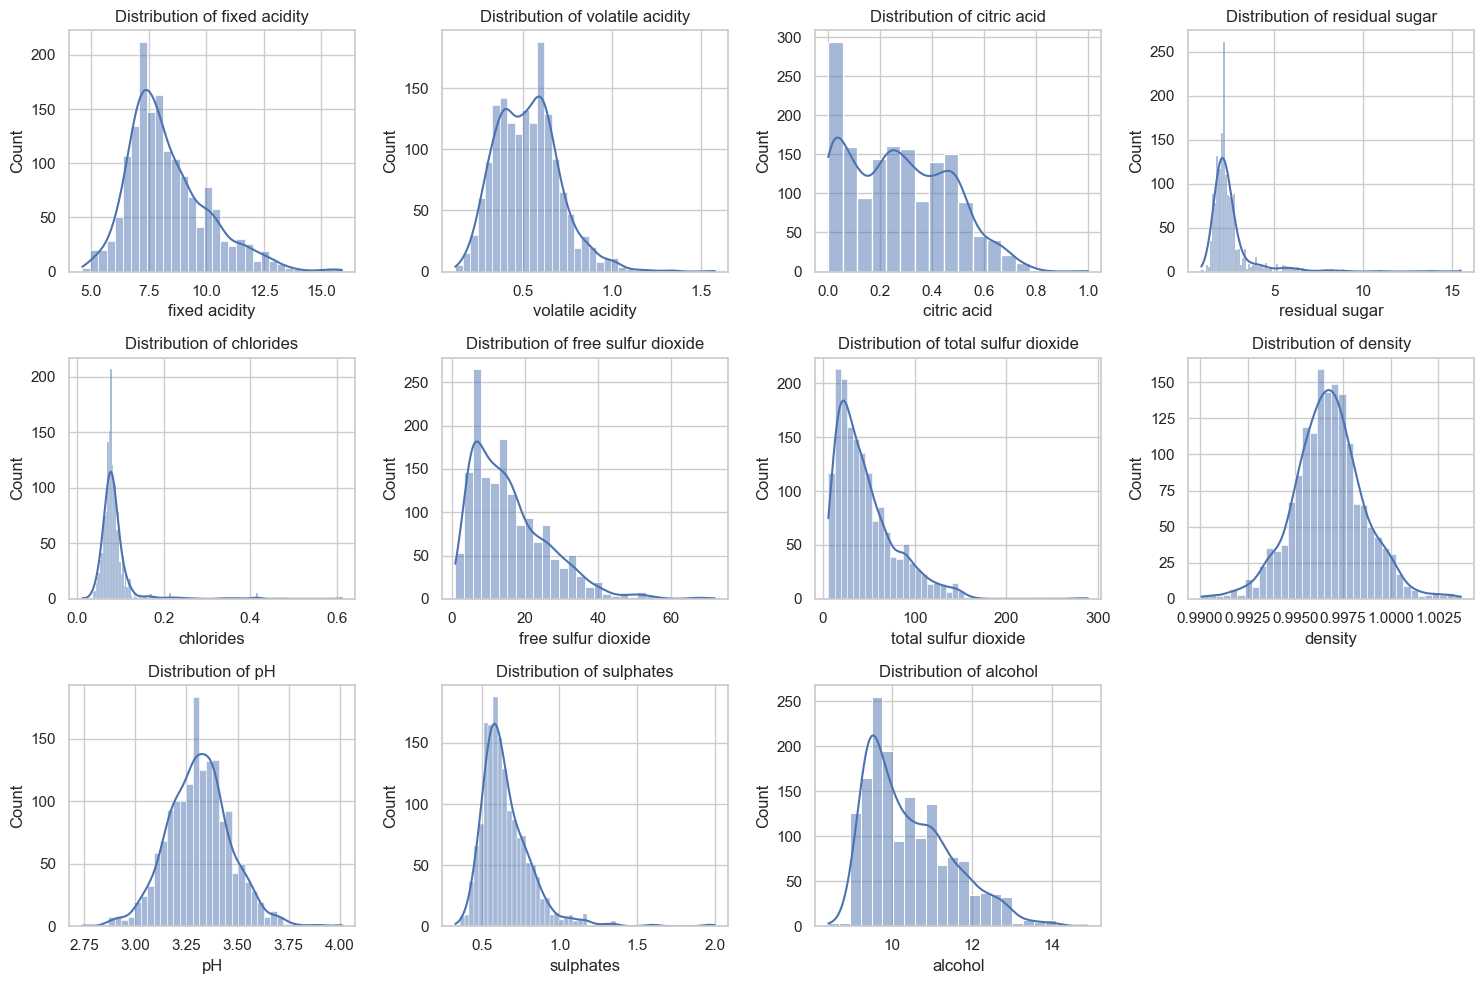

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
df = pd.read_csv('../data/raw/winequality-red.csv')

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Graficar histogramas para cada característica
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[:-1], 1):  # Excluir la columna 'quality' por ahora
    plt.subplot(3, 4, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()


### Matriz de Correlación

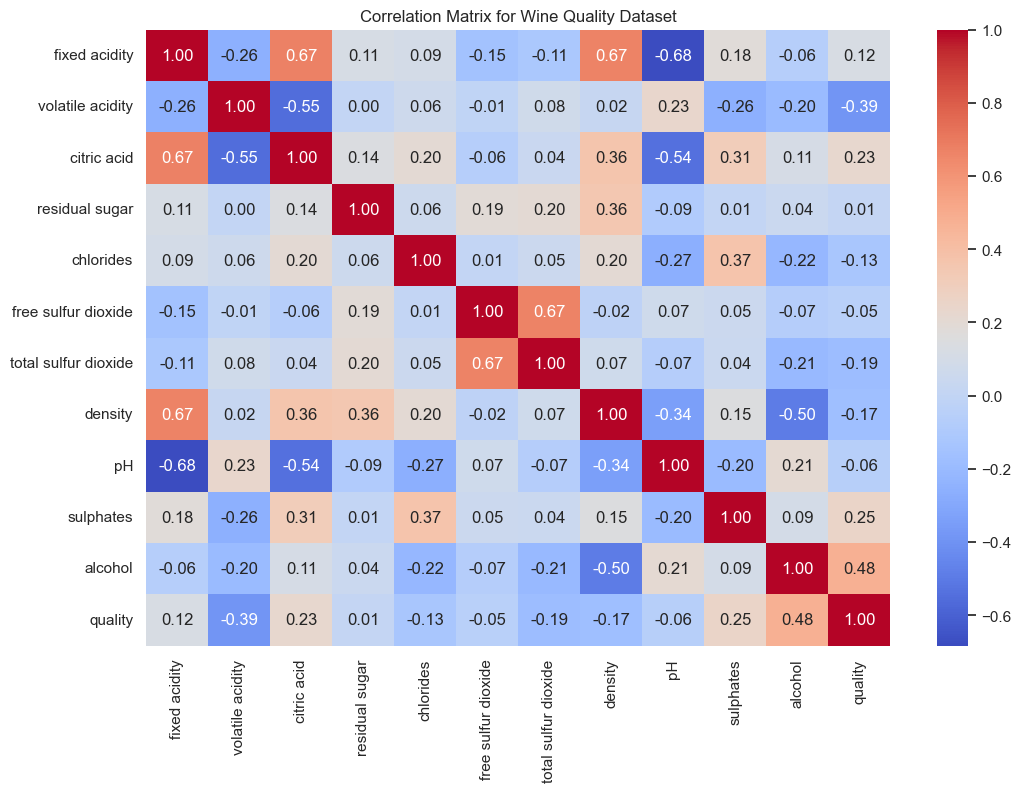

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
df = pd.read_csv('../data/raw/winequality-red.csv')

# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Graficar la matriz de correlación como un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Wine Quality Dataset')
plt.show()


## MODELOS

-----------------------------------------------------------------------------------

In [19]:
from sklearn.model_selection import train_test_split

# Feature Engineering: Create new features
# Example: Ratio of alcohol to volatile acidity
df['alcohol_to_volatile_acidity'] = df['alcohol'] / df['volatile acidity']

# Separate features and target variable
X = df.drop('quality', axis=1)
y = df['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1279, 12), (320, 12), (1279,), (320,))

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize models
linear_regression = LinearRegression()
decision_tree = DecisionTreeRegressor(random_state=42)

# Train models
linear_regression.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = linear_regression.predict(X_test)
y_pred_dt = decision_tree.predict(X_test)

# Evaluate models
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

mse_lr, r2_lr, mse_dt, r2_dt

(0.39001254407830527, 0.4031996217274846, 0.6625, -0.013762907395507895)

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Cargar los datos desde un archivo CSV
data = pd.read_csv('../data/raw/winequality-red.csv')

# Verificar valores faltantes en el conjunto de datos
missing_values = data.isnull().sum()

# Verificar filas duplicadas en el conjunto de datos
duplicate_rows = data.duplicated().sum()

# Eliminar filas duplicadas
data_cleaned = data.drop_duplicates()

# Feature Engineering: Crear nuevas características
data_cleaned['alcohol_to_volatile_acidity'] = data_cleaned['alcohol'] / data_cleaned['volatile acidity']

# Separar características y variable objetivo
X = data_cleaned.drop('quality', axis=1)
y = data_cleaned['quality']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar modelos
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Entrenar y evaluar modelos
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R²': r2}

# Mostrar resultados
for name, result in results.items():
    print(f"{name}: MSE = {result['MSE']:.4f}, R² = {result['R²']:.4f}")


C:\Users\inaki\AppData\Local\Temp\ipykernel_2864\948059094.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['alcohol_to_volatile_acidity'] = data_cleaned['alcohol'] / data_cleaned['volatile acidity']


Linear Regression: MSE = 0.4309, R² = 0.3917
Decision Tree: MSE = 0.8493, R² = -0.1989
Random Forest: MSE = 0.3920, R² = 0.4466
Gradient Boosting: MSE = 0.3819, R² = 0.4609


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Definir el modelo
model = GradientBoostingRegressor(random_state=42)

# Definir la cuadrícula de parámetros para buscar
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5]
}

# Configurar Grid Search con validación cruzada
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2')

# Ajustar Grid Search a los datos
grid_search.fit(X_train, y_train)

# Mejor modelo y sus parámetros
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluar el mejor modelo en el conjunto de prueba
y_pred_best = best_model.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

best_params, mse_best, r2_best

----------------------------------------------------------------------------------------------------

target

In [ ]:
df['quality_label'] = df['quality'].apply(lambda q: 'baja' if q<=5 else ('media' if q==6 else 'alta'))



✅ Distribución de clases:
quality_label
baja     744
media    638
alta     217
Name: count, dtype: int64

🔎 Modelo: Regresión Logística

📊 Reporte de clasificación:
              precision    recall  f1-score   support

        alta       0.52      0.35      0.42        43
        baja       0.67      0.75      0.71       149
       media       0.51      0.50      0.51       128

    accuracy                           0.60       320
   macro avg       0.57      0.53      0.54       320
weighted avg       0.59      0.60      0.59       320



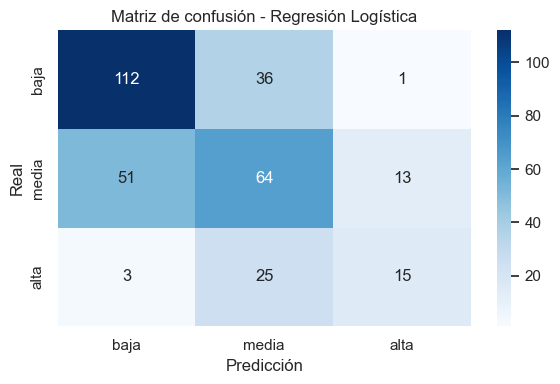


🔎 Modelo: Árbol de Decisión

📊 Reporte de clasificación:
              precision    recall  f1-score   support

        alta       0.63      0.60      0.62        43
        baja       0.75      0.74      0.75       149
       media       0.66      0.67      0.66       128

    accuracy                           0.70       320
   macro avg       0.68      0.67      0.68       320
weighted avg       0.70      0.70      0.70       320



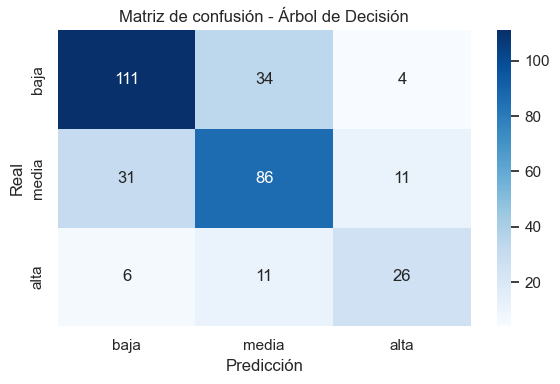


🔎 Modelo: Random Forest

📊 Reporte de clasificación:
              precision    recall  f1-score   support

        alta       0.68      0.58      0.62        43
        baja       0.77      0.81      0.79       149
       media       0.68      0.67      0.67       128

    accuracy                           0.72       320
   macro avg       0.71      0.69      0.70       320
weighted avg       0.72      0.72      0.72       320



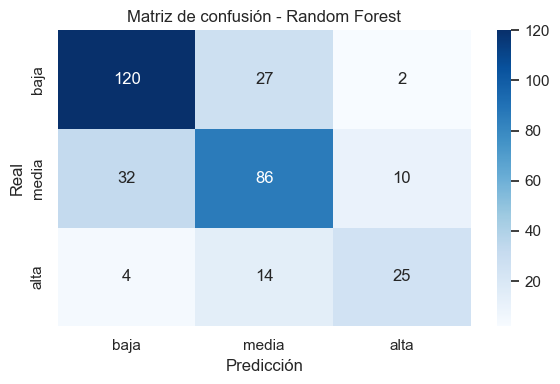

In [ ]:
df = pd.read_csv("../data/raw/winequality-red.csv", sep=',')

df.columns = df.columns.str.strip().str.lower()

if 'quality' not in df.columns:
    print(" ERROR: la columna 'quality' no se encuentra en el dataset.")
    print("Columnas actuales:", df.columns.tolist())
    raise SystemExit

df['quality_label'] = df['quality'].apply(lambda q: 'baja' if q <= 5 else ('media' if q == 6 else 'alta'))

print("\n Distribución de clases:")
print(df['quality_label'].value_counts())

X = df.drop(['quality', 'quality_label'], axis=1)
y = df['quality_label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

modelos = {
    "Regresión Logística": LogisticRegression(max_iter=1000),
    "Árbol de Decisión": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

for nombre, modelo in modelos.items():
    print(f"\n Modelo: {nombre}")
    modelo.fit(X_train_scaled, y_train)
    y_pred = modelo.predict(X_test_scaled)
    
    print("\n Reporte de clasificación:")
    print(classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred, labels=["baja", "media", "alta"])
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d',
                xticklabels=["baja", "media", "alta"],
                yticklabels=["baja", "media", "alta"],
                cmap="Blues")
    plt.title(f"Matriz de confusión - {nombre}")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.tight_layout()
    plt.show()
